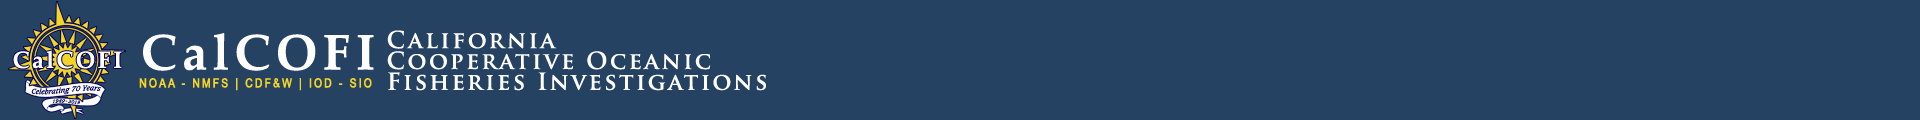
The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.



### Step 1: Import the required libraries. ...
### Step 2: Initialize and print the Dataset. ...
### Step 3: Select all the rows and column 1 from dataset to “X”. ...
### Step 4: Select all of the rows and column 2 from dataset to “y”. ...
### Step 5: Fit Model to the dataset. ...
### Step 6: Predicting a new value. ...
### Step 7: Visualising the result.

### Question:

CalCOFI data: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator


 The operator module exports a set of efficient functions corresponding to the intrinsic operators of Python. For example, operator. add(x, y) is equivalent to the expression x+y . Many function names are those used for special methods, without the double underscores.

In [2]:
bottle = pd.read_csv("D:/ML Data/bottle.csv")
bottle.head(2)

C:\Users\bsram\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
Cst_Cnt                864863 non-null int64
Btl_Cnt                864863 non-null int64
Sta_ID                 864863 non-null object
Depth_ID               864863 non-null object
Depthm                 864863 non-null int64
T_degC                 853900 non-null float64
Salnty                 817509 non-null float64
O2ml_L                 696201 non-null float64
STheta                 812174 non-null float64
O2Sat                  661274 non-null float64
Oxy_µmol/Kg            661268 non-null float64
BtlNum                 118667 non-null float64
RecInd                 864863 non-null int64
T_prec                 853900 non-null float64
T_qual                 23127 non-null float64
S_prec                 817509 non-null float64
S_qual                 74914 non-null float64
P_qual                 673755 non-null float64
O_qual                 184676 non-null float64
SThtaq  

In [4]:
bottle.shape

(864863, 74)

In [39]:
bottle.describe() # Basic Stat

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [40]:
bottle.shape

(864863, 74)

In [6]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
bottle_df = bottle[['T_degC','Salnty']]

# And called again
bottle_df.columns = ['Temperature', 'Salinity']

In [8]:
bottle_df.shape

(500, 2)

In [7]:
bottle_df = bottle_df[:][:500]      # lets take limit for speed regression calculating
bottle_df.head()

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


C:\Users\bsram\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bsram\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


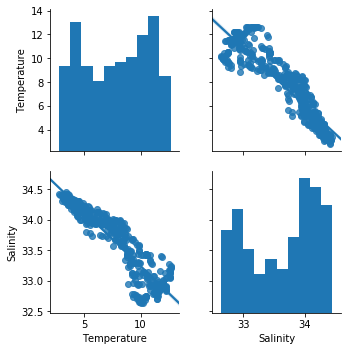

In [9]:
# See picture with scatter or plot method

# sns.lmplot(x="Salinity", y="Temperature", data=bottle_df, order=2, ci=None);
sns.pairplot(bottle_df, kind="reg")

In [10]:
# see how many null values we have
bottle_df.isnull().sum()

Temperature    1
Salinity       6
dtype: int64

In [12]:
# Drop NaN or missing input numbers

bottle_df.fillna(method='ffill', inplace=True)
#bottle_df.isnull().sum()

In [13]:
# Features chose

X = np.array(bottle_df['Salinity']).reshape(-1, 1)
y = np.array(bottle_df['Temperature']).reshape(-1, 1)


In [15]:
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## 1.Linear Regression


### Linear regression in Machine Learning

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. 


It's used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types: Simple regression.

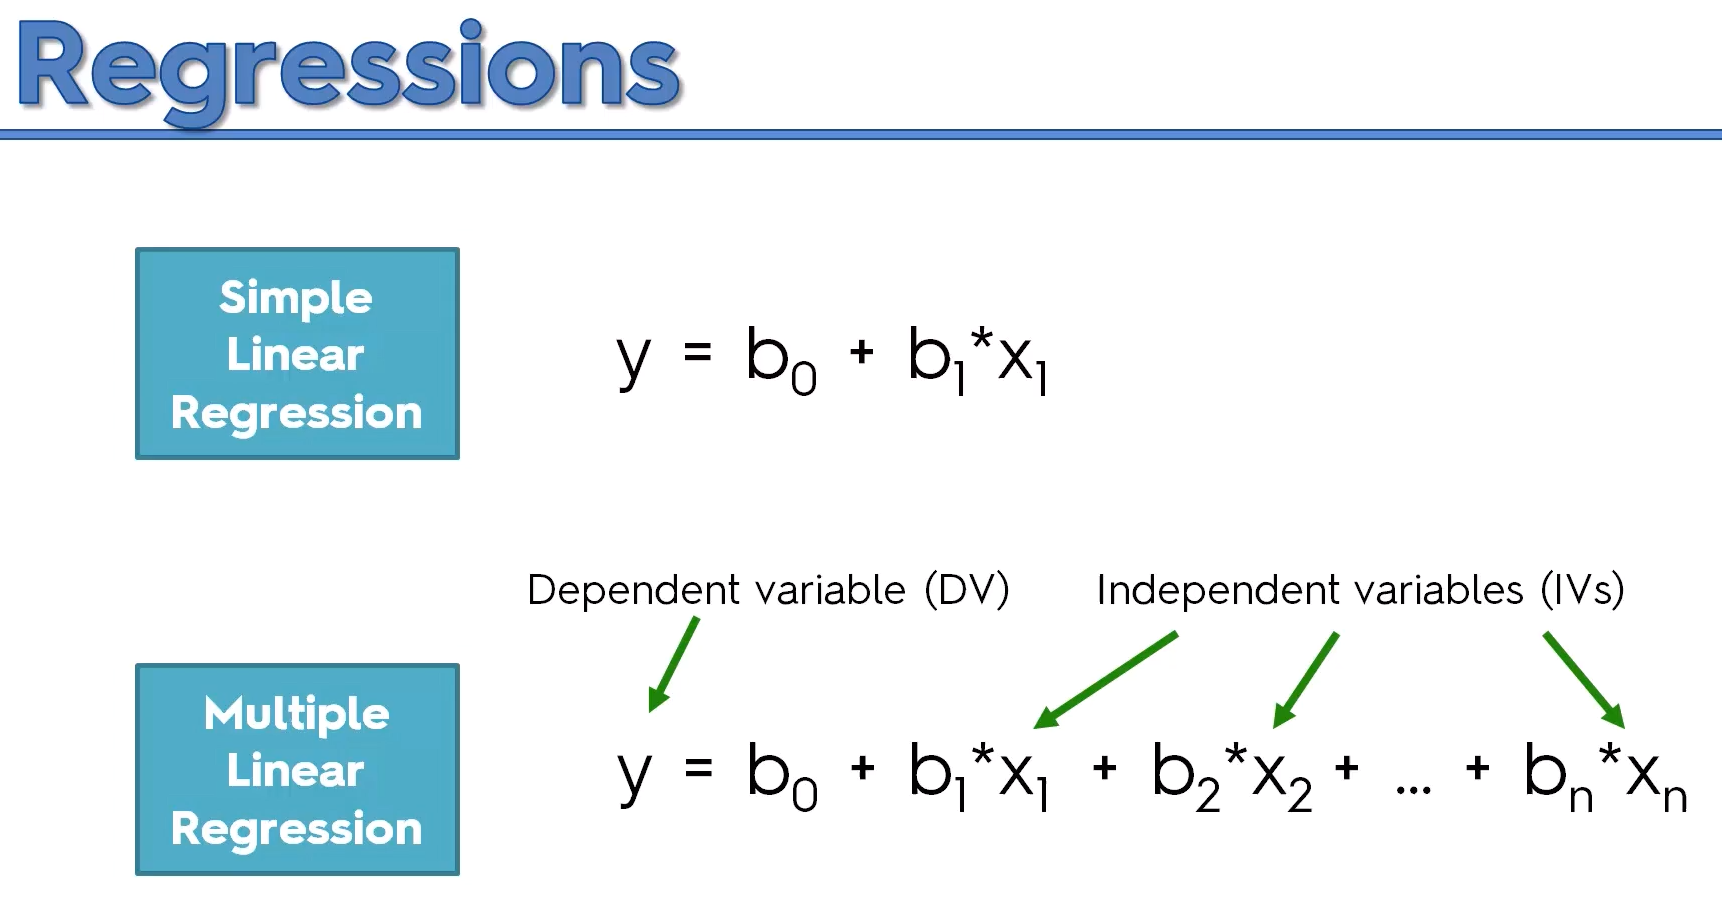

    

In [16]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred = lin_df.predict(X_test)   # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)   # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 82.7%


In [ ]:
y_pred

In [32]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.827


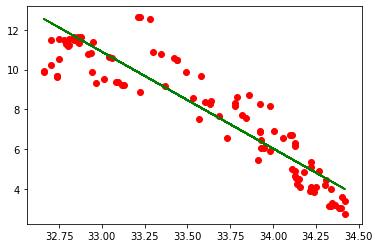

In [33]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

## 2.Multiple Linear Regression


multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable

In [34]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient

array([[-4.84772527]])

In [35]:
y_pred = mlin_df.predict(X_train)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_train, mlin_df.predict(X_train)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train, y_pred)));      # this is test error score

RMSE Score for Test set: 1.1
R2 Score for Test set: 0.853


### 2.1.Multiple Linear Regression Model Tunning

In [36]:
# cross validation method is giving better and clear result
cross_val_score(mlin_df, X, y, cv=10, scoring = 'r2').mean()

0.7897720931156469

In [37]:
mlin_df.score(X_train, y_train)      # r2 value

0.8534867439916551

In [22]:
np.sqrt(-cross_val_score(mlin_df, 
                X_train, 
                y_train, 
                cv=10, 
                scoring = 'neg_mean_squared_error')).mean()

1.1221107797911745

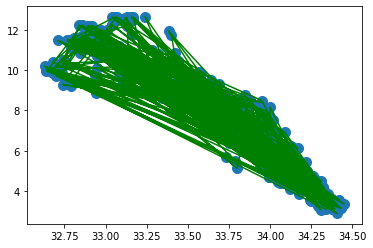

In [25]:
# Finally draw figure of Multiple Linear Regression Model

plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()

## 3.Polynomial Regression

The goal of polynomial regression is to model a non-linear relationship between the independent and dependent variables (technically, between the independent variable and the conditional mean of the dependent variable).


Linear regression is polynomial regression of degree 1, and generally takes the form y = m x + b where m is the slope, and b is the y-intercept. It could just as easily be written f( x ) = c0 + c1 x with c1 being the slope and c0 the y-intercept.

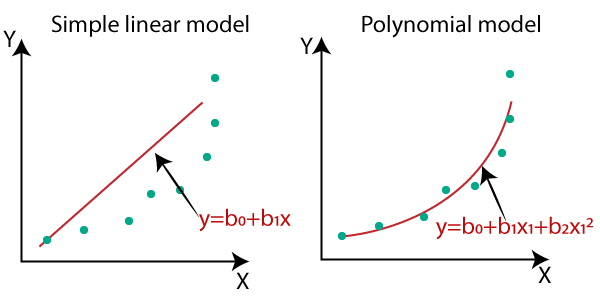

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 4)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

In [27]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.8
R2 Score for Test set: 0.92


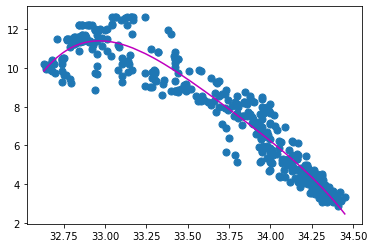

In [28]:
plt.scatter(X_train, y_train, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,polynomial_predict), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.show()

# 4.Decision Tree Regression 

Decision tree is one of the predictive modelling approaches used in statistics , data mining and machine learning . Decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. ... Classification And Regression Tree (CART) is general term for this.


Decision tree builds regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.


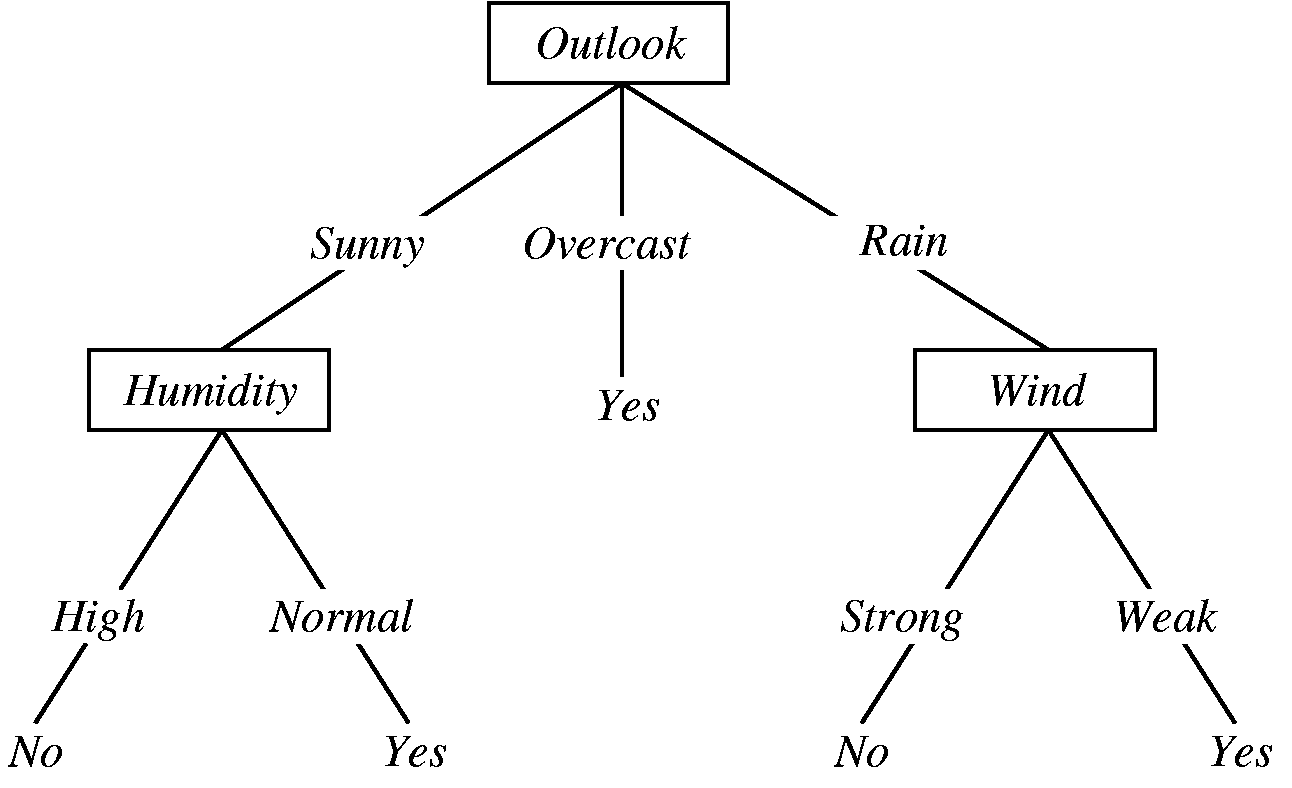

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()          # create  DecisionTreeReg with sklearn
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
dt_predict = dt_reg.predict(X_train)
#dt_predict.mean()

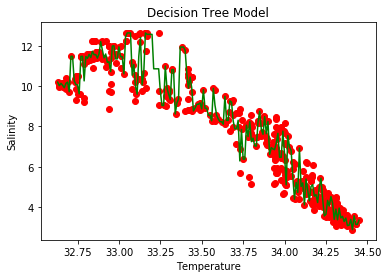

In [41]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

In [42]:
rmse = np.sqrt(mean_squared_error(y_train,dt_predict))
r2 = r2_score(y_train,dt_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.44
R2 Score for Test set: 0.98


## 5.Random Forest Model

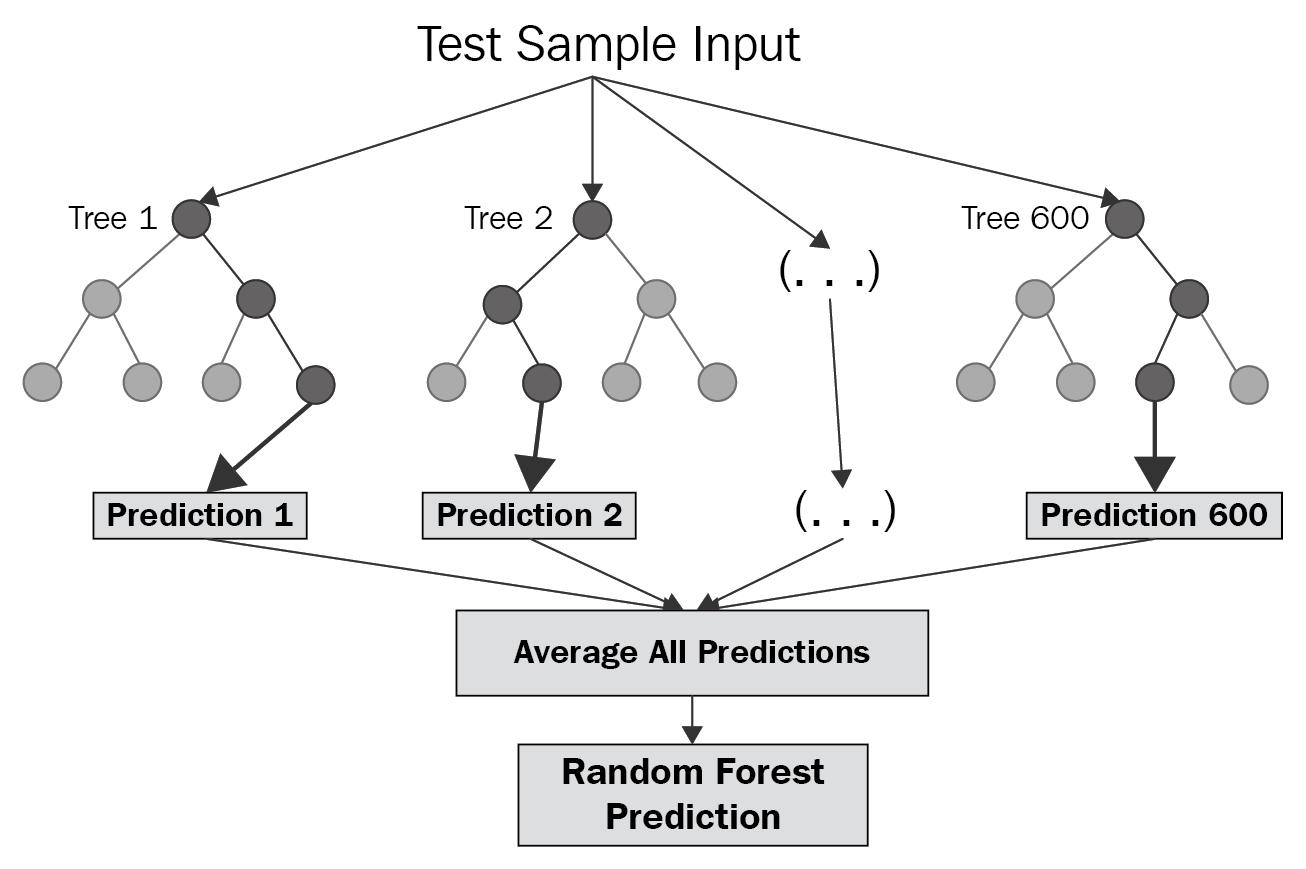

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5, random_state=0)
rf_reg.fit(X_train,y_train)
rf_predict = rf_reg.predict(X_train)
#rf_predict.mean()

C:\Users\bsram\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


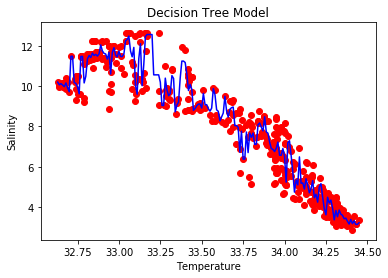

In [44]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="b")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

In [45]:
rmse = np.sqrt(mean_squared_error(y_train,rf_predict))
r2 = r2_score(y_train,rf_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.54
R2 Score for Test set: 0.97
